In [1]:
DATA_FILE_PATH = '../../data/xclara.csv'

In [3]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(DATA_FILE_PATH)
print(df.shape)
df.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


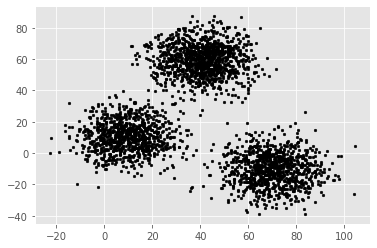

In [13]:
X1 = df['V1'].values
X2 = df['V2'].values
X = np.array(list(zip(X1, X2)))

plt.scatter(X1, X2, color = 'black', s = 7)

In [32]:
k = 3

C_x = np.random.randint(X.max() - 20, size = k)
C_y = np.random.randint(X.max() - 20, size = k)
C = np.array(list(zip(C_x, C_y)), dtype = np.float32)
C

array([[20., 32.],
       [42., 80.],
       [ 1., 23.]], dtype=float32)

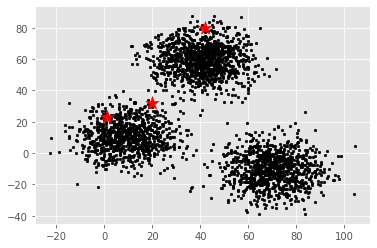

In [39]:
plt.scatter(X1, X2, color = 'black', s = 7)
plt.scatter(C_x, C_y, color = 'red', s = 200, marker = '*')

In [33]:
C_old = np.zeros(C.shape)
C_old

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [34]:
def dist(a, b, ax = 1):
    return np.linalg.norm(a - b, axis = ax)

In [37]:
error = dist(C, C_old, ax = None)
error

100.58826969383657

In [38]:
clusters = np.zeros(len(X))

In [ ]:
while error != 0:
    # Calculate distance from each point to each centroid
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster